In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Set up complete")

Set up complete


In [2]:
data = pd.read_csv("customer_shopping_data.csv")
data.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [3]:
data.shape

(99457, 10)

In [4]:
data.size

994570

In [5]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
data.value_counts()

invoice_no  customer_id  gender  age  category         quantity  price    payment_method  invoice_date  shopping_mall    
I999994     C299697      Female  21   Technology       3         3150.00  Cash            9/4/2021      Kanyon               1
I999621     C200815      Female  68   Shoes            3         1800.51  Credit Card     24/10/2021    Kanyon               1
I999572     C379550      Female  49   Souvenir         3         35.19    Credit Card     25/05/2021    Mall of Istanbul     1
I999562     C983564      Female  44   Clothing         1         300.08   Credit Card     1/2/2023      Mall of Istanbul     1
I999457     C113827      Male    29   Food & Beverage  3         15.69    Debit Card      18/11/2022    Mall of Istanbul     1
                                                                                                                            ..
I100028     C325553      Female  18   Clothing         1         300.08   Credit Card     19/06/2021    Metrocity   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
data["customer_id"].value_counts()

customer_id
C273973    1
C137631    1
C776199    1
C363191    1
C180055    1
          ..
C657758    1
C189076    1
C988172    1
C266599    1
C111565    1
Name: count, Length: 99457, dtype: int64

In [10]:
data["customer_id"].duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
data["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

## Data Visualization -

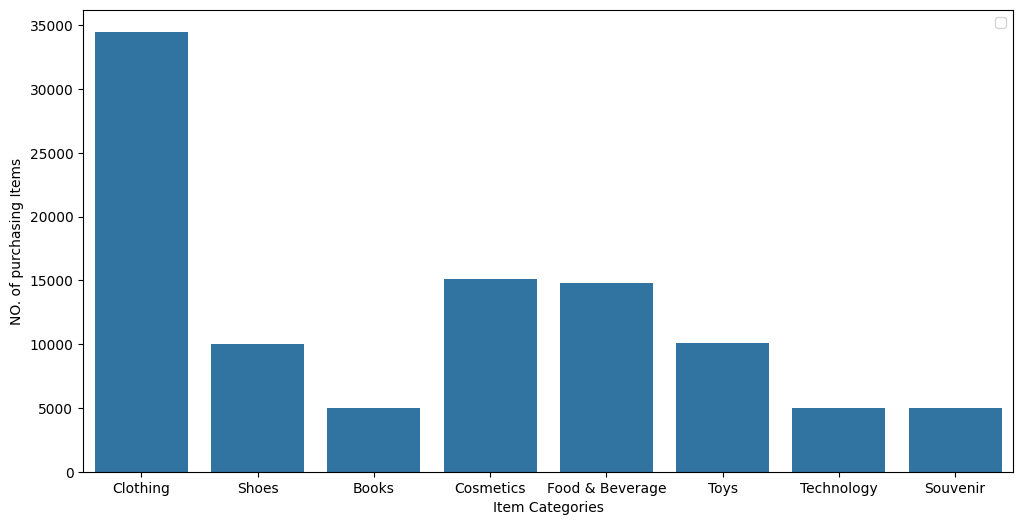

In [27]:
category_count = sorted(data["category"].value_counts(),reverse = True)
plt.figure(figsize = (12,6))
sns.countplot(x = data["category"])
plt.ylabel("NO. of purchasing Items")
plt.xlabel("Item Categories")
plt.legend()
plt.show()
           

Observation - Customers loves to buy clothes more than other categories item.

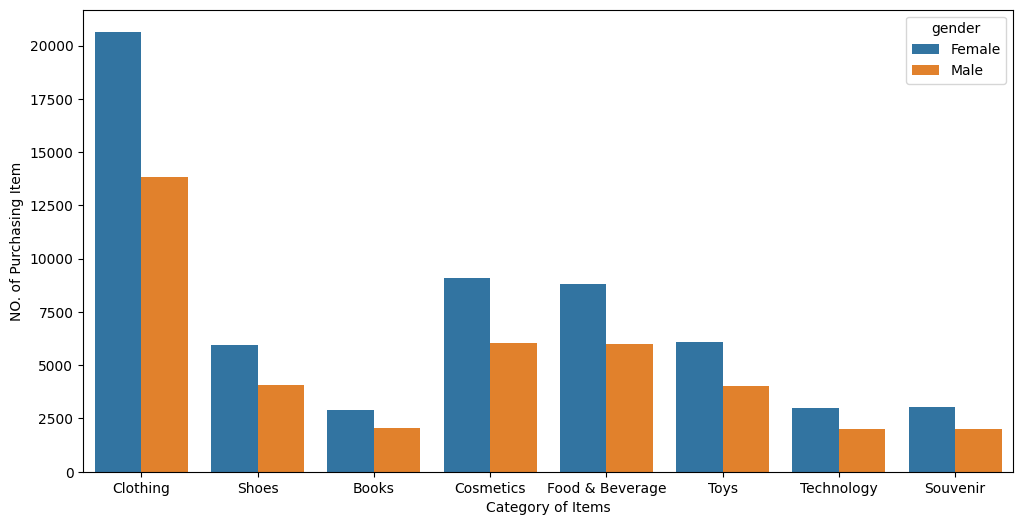

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(x = data["category"],hue = data["gender"])
plt.xlabel("Category of Items")
plt.ylabel("NO. of Purchasing Item")
plt.show()

 Observation - Female purchasing rate is more than Male

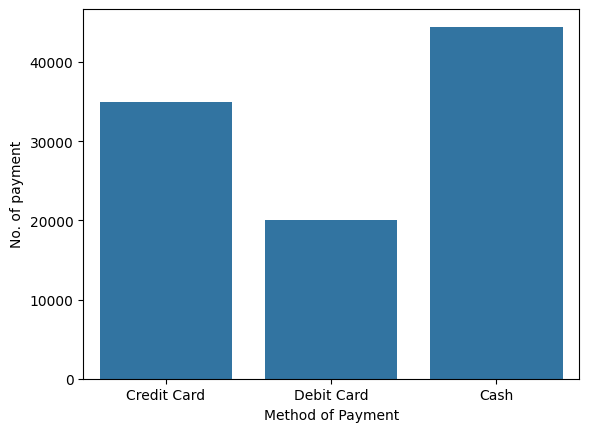

In [15]:
sns.countplot(x = data["payment_method"])
plt.xlabel("Method of Payment")
plt.ylabel("No. of payment")
plt.show()

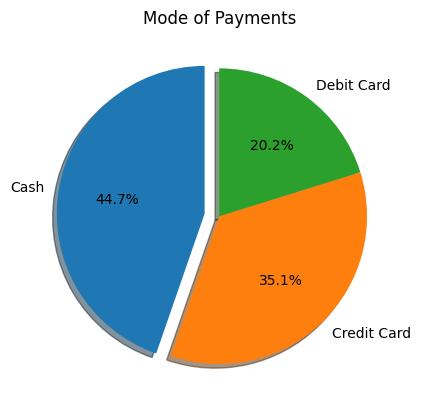

In [35]:
value = data["payment_method"].value_counts()
plt.pie(value,labels = value.index,autopct = "%1.1f%%",shadow = True,explode = [0.1,0,0],startangle = 90)
plt.title("Mode of Payments")
plt.show()

Obesrvation - Most of the customer make payments through cash then Creditcard,DebitCard.

In [18]:
gender_count = data["gender"].value_counts()

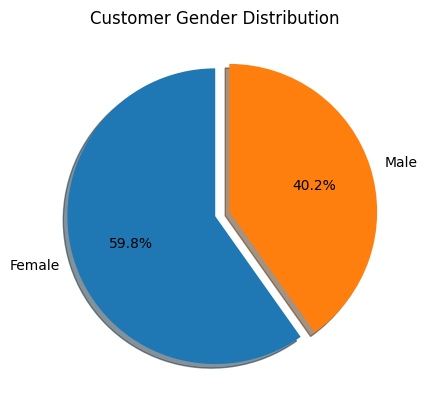

In [38]:
plt.pie(gender_count,labels = gender_count.index,autopct = "%1.1f%%",startangle = 90,shadow = True,explode=[0,0.1])
plt.title("Customer Gender Distribution")
plt.show()

obervation - Female purchasing percentage is more than Men.

Text(0.5, 1.0, 'Average Price by Category')

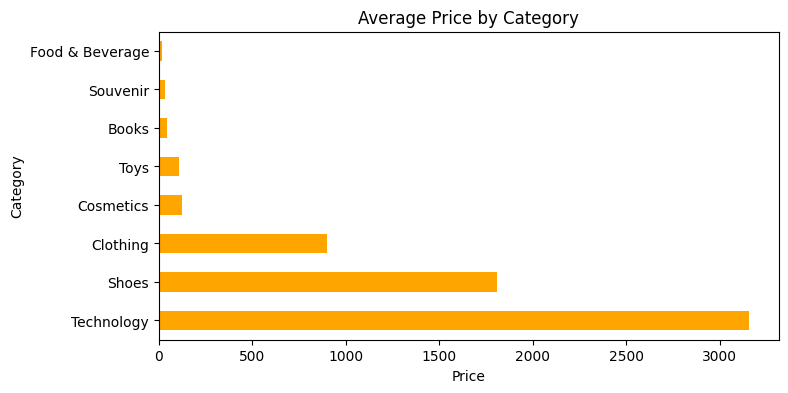

In [29]:
category_mean = data.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
category_mean.plot(kind='barh', color='orange')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Average Price by Category')